## Part 3: Exploratory Data Analysis

**In this notebook,** I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.

Importing the required libraries:

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import pickle

## for geospatial
import folium
import geopy
from mpl_toolkits.basemap import Basemap

## for machine learning
from sklearn import preprocessing, cluster

#### Importing the saved clean earthquake data, and doing some house-keeping on the dataframe.

In [2]:
file_path = "../datasets/" + "combined_eq_california" + "_timeseries" + ".csv"

#Converting to time-series with respect to "time" column
df_eq = pd.read_csv(file_path, index_col=0)

df_eq["time"] = df_eq.index

df_eq.head(3)

type   mag                               place  \
time                                                                            
1970-01-02 10:45:20.570  earthquake  3.14         24km S of Santa Barbara, CA   
1970-01-02 21:47:53.740  earthquake  2.61             12km NE of Inyokern, CA   
1970-01-03 02:51:58.400  earthquake  4.00  San Francisco Bay area, California   

                           status  tsunami  sig    net        nst      dmin  \
time                                                                          
1970-01-02 10:45:20.570  reviewed        0  152     ci  11.000000  0.234700   
1970-01-02 21:47:53.740  reviewed        0  105     ci   6.000000  0.136800   
1970-01-03 02:51:58.400  reviewed        0  246  ushis  20.500989  0.198006   

                              rms         gap magType   longitude   latitude  \
time                                                                           
1970-01-02 10:45:20.570  0.590000  205.000000      ml -119.695667  34.206000   
1970-01-02 21:47:53.740  0.730000   96.000000      ml -117.733667  35.735167   
1970-01-03 02:51:58.400  0.197771  121.016289      mb -122.088000  37.298000   

                            depth  \
time                                
1970-01-02 10:45:20.570  6.000000   
1970-01-02 21:47:53.740  1.650000   
1970-01-03 02:51:58.400  6.274206   

                                                                      name  \
time                                                                         
1970-01-02 10:45:20.570  M: 3.14 /  1970-01-02 / 24km S of Santa Barbar...   
1970-01-02 21:47:53.740    M: 2.61 /  1970-01-02 / 12km NE of Inyokern, CA   
1970-01-03 02:51:58.400  M: 4.0 /  1970-01-03 / San Francisco Bay area,...   

                                            time  
time                                              
1970-01-02 10:45:20.570  1970-01-02 10:45:20.570  
1970-01-02 21:47:53.740  1970-01-02 21:47:53.740  
1970-01-03 02:51:58.400  1970-01-03 02:51:58.400

#### All the column datatypes look fine!

In [3]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313332 entries, 1970-01-02 10:45:20.570 to 2020-10-01 15:28:09.630
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   type       313332 non-null  object 
 1   mag        313332 non-null  float64
 2   place      313332 non-null  object 
 3   status     313332 non-null  object 
 4   tsunami    313332 non-null  int64  
 5   sig        313332 non-null  int64  
 6   net        313332 non-null  object 
 7   nst        313332 non-null  float64
 8   dmin       313332 non-null  float64
 9   rms        313332 non-null  float64
 10  gap        313332 non-null  float64
 11  magType    313329 non-null  object 
 12  longitude  313332 non-null  float64
 13  latitude   313332 non-null  float64
 14  depth      313332 non-null  float64
 15  name       313332 non-null  object 
 16  time       313332 non-null  object 
dtypes: float64(8), int64(2), object(7)
memory usage: 43.0+ MB


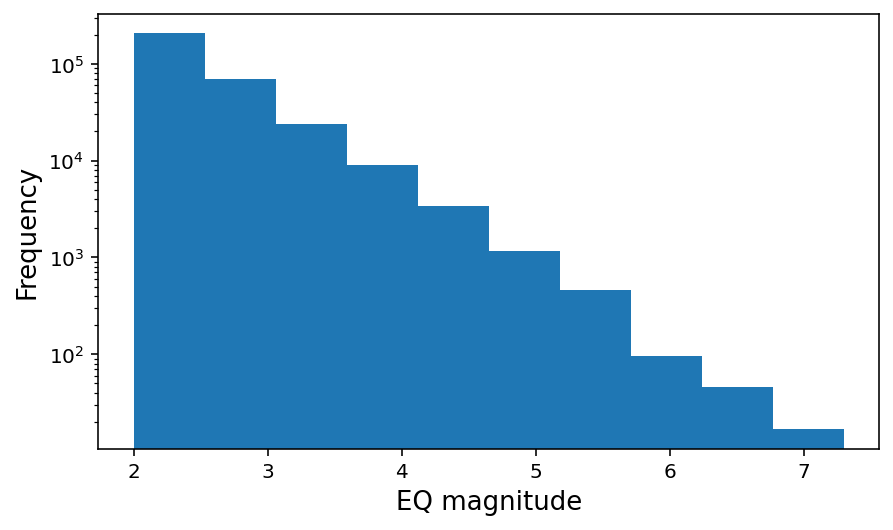

In [4]:
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize = [7, 4])


plt.hist(np.array(df_eq.mag), log=True);
plt.xlabel("EQ magnitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

#### Figure: The moment magnitude distribution is also shown by histogram. The magnitude distribution closely follows Poissonâ€™s distribution

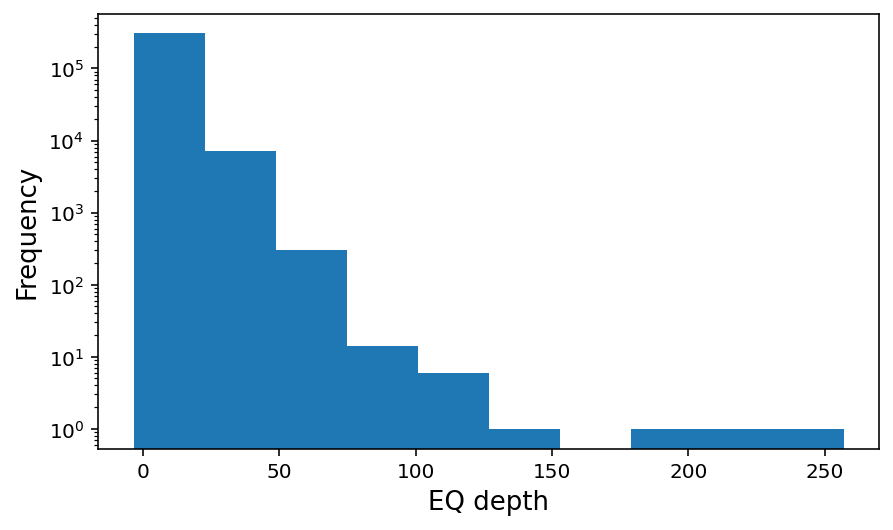

In [5]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.depth), log=True);
plt.xlabel("EQ depth", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

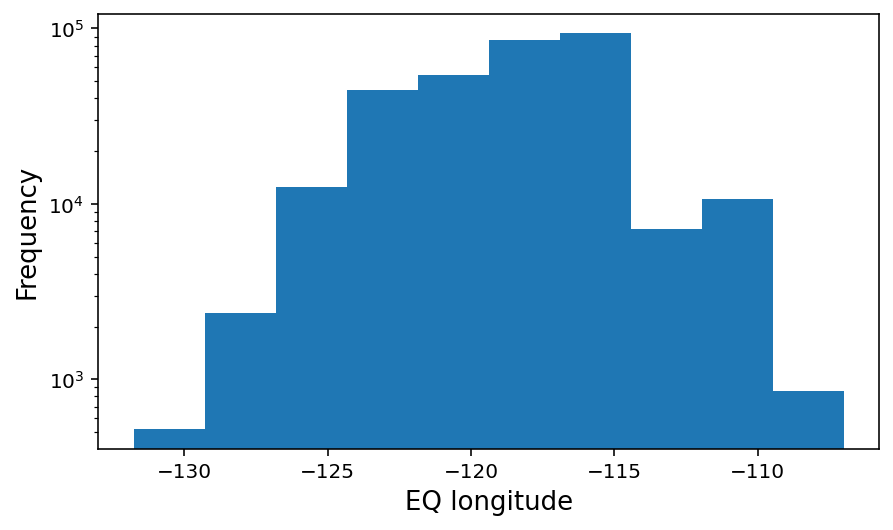

In [6]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.longitude), log=True);
plt.xlabel("EQ longitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

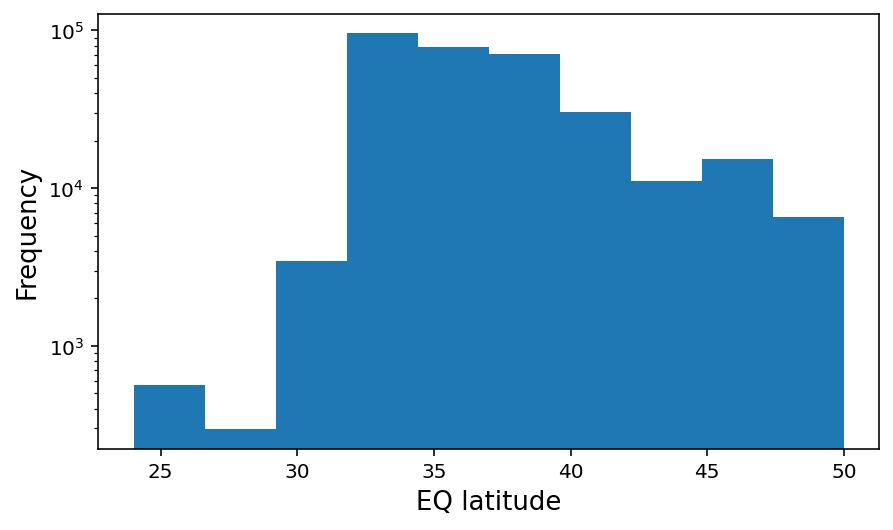

In [7]:
plt.figure(figsize = [7, 4])
plt.hist(np.array(df_eq.latitude), log=True);
plt.xlabel("EQ latitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

## How many large earthquakes (M>6) happened in last 50 years?

In [8]:
df_eq_large = df_eq[df_eq["mag"]>6].copy()

# Fixing the time column datatype
df_eq_large["time"] = pd.to_datetime(df_eq_large["time"])

df_eq_large["time_diff_day"] = df_eq_large["time"].diff()

df_eq_large.head(5)

type  mag                       place  \
time                                                                   
1971-02-09 14:00:41.920  earthquake  6.6  10km SSW of Agua Dulce, CA   
1971-09-30 08:18:00.000  earthquake  6.5          Gulf of California   
1974-05-31 14:04:59.900  earthquake  6.3          Gulf of California   
1975-03-28 02:31:05.700  earthquake  6.1              southern Idaho   
1975-07-08 09:37:27.300  earthquake  6.5     Baja California, Mexico   

                            status  tsunami   sig     net        nst  \
time                                                                   
1971-02-09 14:00:41.920   reviewed        0  1560      ci   0.000000   
1971-09-30 08:18:00.000  automatic        0   650  iscgem  20.500989   
1974-05-31 14:04:59.900   reviewed        0   611      us  20.500989   
1975-03-28 02:31:05.700   reviewed        0   572      us  20.500989   
1975-07-08 09:37:27.300   reviewed        0   650      us  20.500989   

                             dmin       rms         gap magType  longitude  \
time                                                                         
1971-02-09 14:00:41.920  0.198006  0.249000  123.400000      mw   -118.370   
1971-09-30 08:18:00.000  0.198006  0.197771  121.016289      mw   -110.834   
1974-05-31 14:04:59.900  0.198006  0.197771  121.016289      ms   -111.238   
1975-03-28 02:31:05.700  0.198006  0.197771  121.016289      mb   -112.548   
1975-07-08 09:37:27.300  0.198006  0.197771  121.016289      ms   -113.346   

                         latitude  depth  \
time                                       
1971-02-09 14:00:41.920    34.416   8.95   
1971-09-30 08:18:00.000    26.816  15.00   
1974-05-31 14:04:59.900    27.226  33.00   
1975-03-28 02:31:05.700    42.061   5.00   
1975-07-08 09:37:27.300    29.459  33.00   

                                                                      name  \
time                                                                         
1971-02-09 14:00:41.920  M: 6.6 /  1971-02-09 / 10km SSW of Agua Dulce, CA   
1971-09-30 08:18:00.000          M: 6.5 /  1971-09-30 / Gulf of California   
1974-05-31 14:04:59.900          M: 6.3 /  1974-05-31 / Gulf of California   
1975-03-28 02:31:05.700              M: 6.1 /  1975-03-28 / southern Idaho   
1975-07-08 09:37:27.300     M: 6.5 /  1975-07-08 / Baja California, Mexico   

                                           time            time_diff_day  
time                                                                      
1971-02-09 14:00:41.920 1971-02-09 14:00:41.920                      NaT  
1971-09-30 08:18:00.000 1971-09-30 08:18:00.000 232 days 18:17:18.080000  
1974-05-31 14:04:59.900 1974-05-31 14:04:59.900 974 days 05:46:59.900000  
1975-03-28 02:31:05.700 1975-03-28 02:31:05.700 300 days 12:26:05.800000  
1975-07-08 09:37:27.300 1975-07-08 09:37:27.300 102 days 07:06:21.600000

In [9]:
df_eq_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1971-02-09 14:00:41.920 to 2020-05-15 11:03:27.176
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   type           85 non-null     object         
 1   mag            85 non-null     float64        
 2   place          85 non-null     object         
 3   status         85 non-null     object         
 4   tsunami        85 non-null     int64          
 5   sig            85 non-null     int64          
 6   net            85 non-null     object         
 7   nst            85 non-null     float64        
 8   dmin           85 non-null     float64        
 9   rms            85 non-null     float64        
 10  gap            85 non-null     float64        
 11  magType        85 non-null     object         
 12  longitude      85 non-null     float64        
 13  latitude       85 non-null     float64        
 14  depth          85 non-

In [10]:
len(df_eq_large)

85

# 85 Large earthquakes (M>6)!

In [11]:
df_eq_large["time_diff_day"].describe()

count                             84
mean     214 days 04:49:19.110190472
std      221 days 14:37:43.431974964
min                  0 days 00:00:18
25%          44 days 19:11:41.638750
50%         150 days 23:23:51.150000
75%         302 days 17:09:17.627500
max        1104 days 13:33:35.280000
Name: time_diff_day, dtype: object

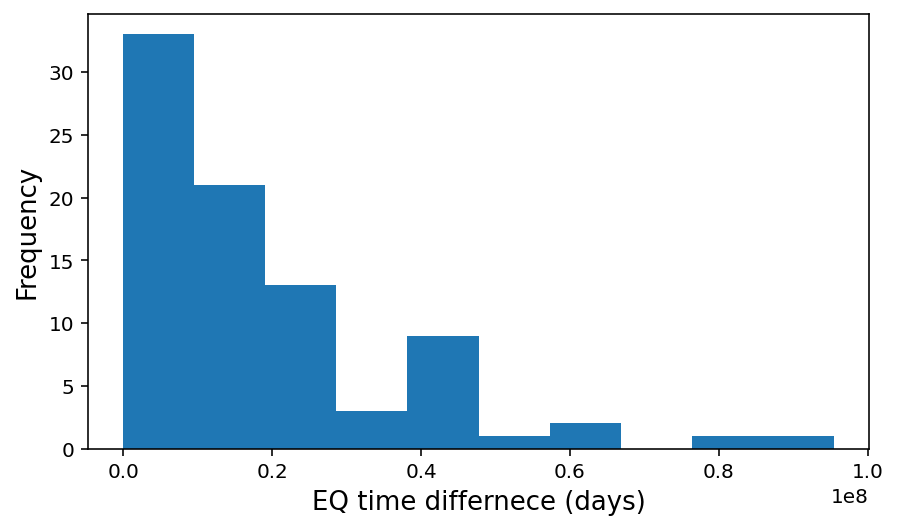

In [12]:
plt.figure(figsize = [7, 4])
df_eq_large["time_diff_day"].astype('timedelta64[s]').plot.hist()

plt.xlabel("EQ time differnece (days)", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

Text(0, 0.5, 'Magnitude')

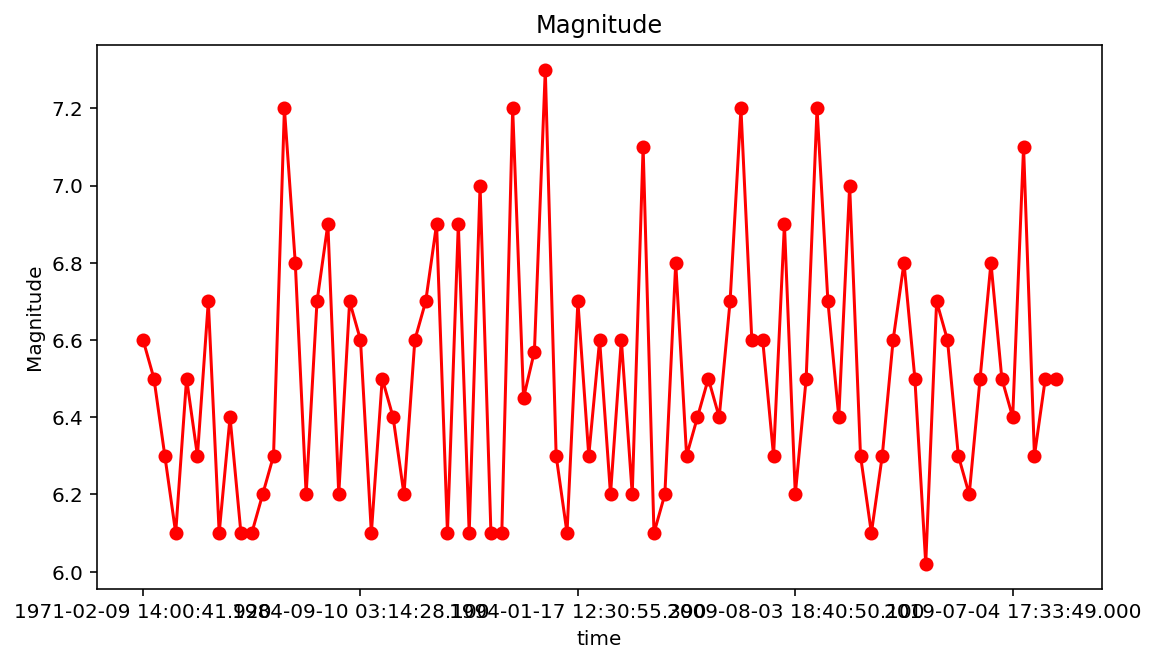

In [13]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_large["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.ylabel("Magnitude")

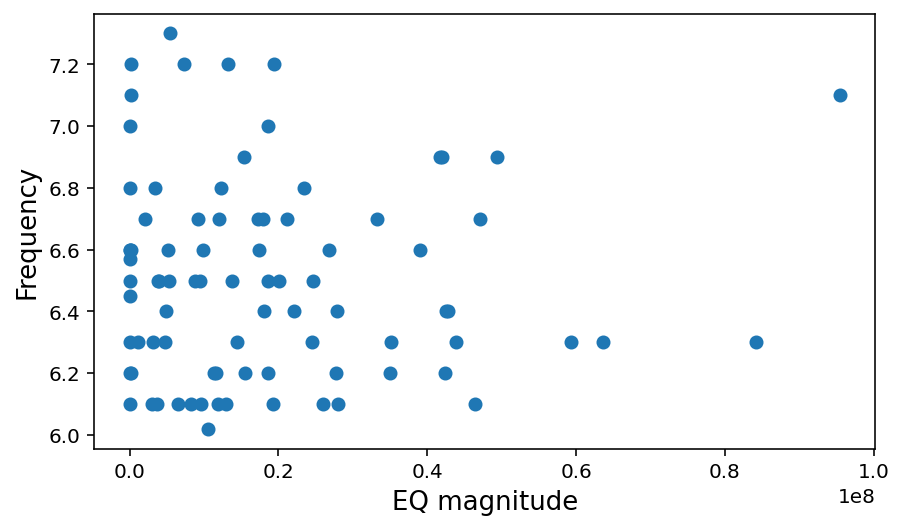

In [14]:
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize = [7, 4])


plt.scatter(df_eq_large["time_diff_day"].astype('timedelta64[s]'),
            df_eq_large.mag)

plt.xlabel("EQ magnitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);

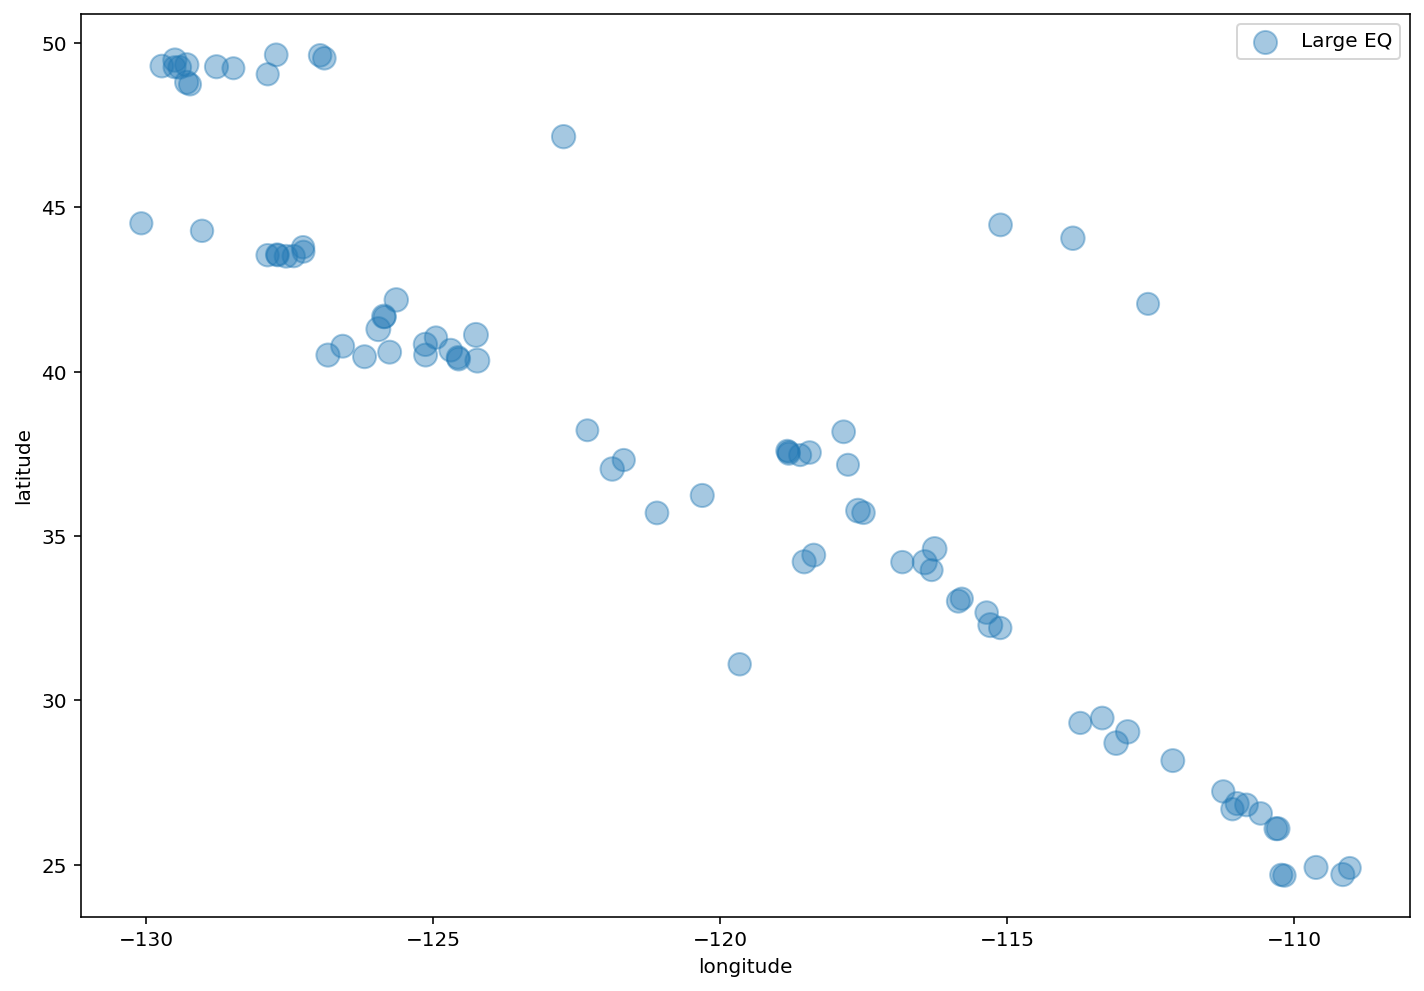

In [15]:
ax = plt.gca()

df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_large['mag']/0.05, label="Large EQ",
    alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

# plt.savefig("../plots/EDA_long_lat.png")


plt.tight_layout()

In [16]:
type(list(pd.to_datetime(df_eq_large.index))[0].date())

datetime.date

/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


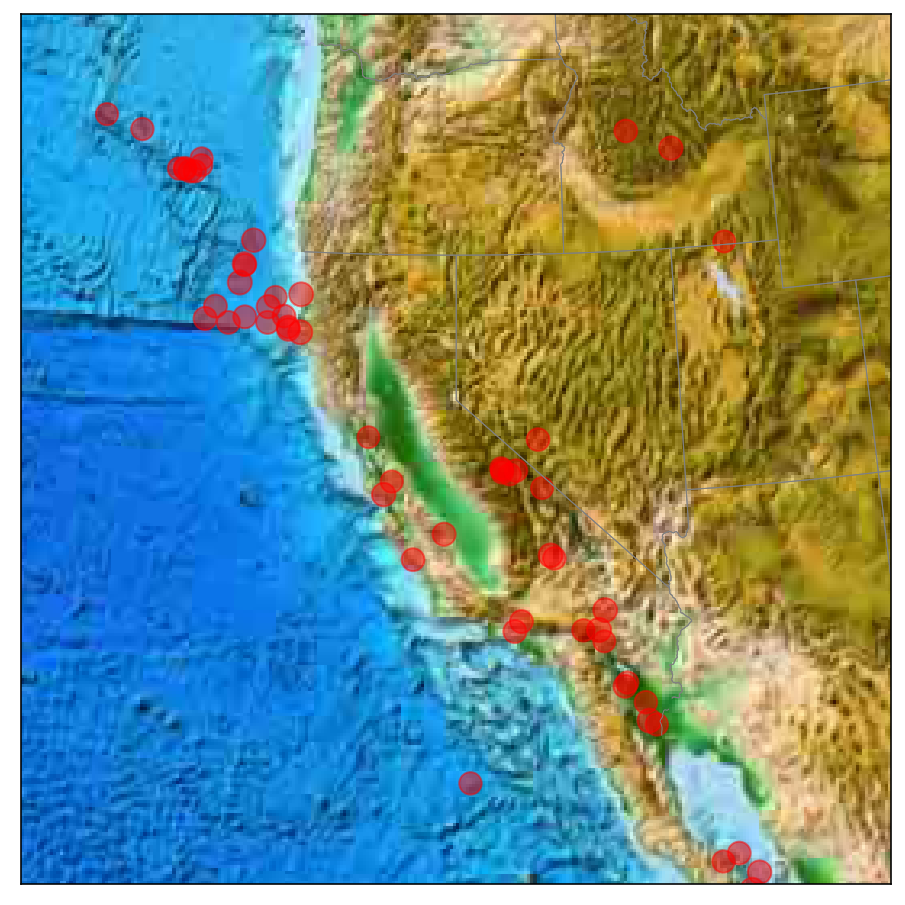

In [17]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=38, lon_0=-120,
            width=2.0E6, height=2.0E6)

# m.bluemarble()
m.etopo()


# m.drawcoastlines(color='blue',linewidth=3)
# m.drawcountries(color='gray',linewidth=3)
m.drawstates(color='gray')


lon = list(df_eq_large["longitude"])
lat = list(df_eq_large["latitude"])

m.scatter(lon,lat, latlon=True,
#           c=color,
          s=df_eq_large['mag']/0.05,
          c = 'red',
#           cmap='YlGnBu_r',
          alpha=0.5)

# df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
#     s=df_eq_large['mag']/0.05, label="Large EQ",
#     alpha=0.4, figsize=(10,7), ax = ax
# )


In [18]:
# Source: https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

city = "California"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_large.copy()

## create color column
lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)




## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

California, United States
[lat, long]: [36.7014631, -118.755997]


#### Figure: most large EQ's were along the coast

## What happened 30 days ahead of 1989 Loma Prieta earthquake ?

In [19]:
df_eq_lp = df_eq['1989-09-19':'1989-10-19']

df_eq_lp.head()

type   mag  \
time                                        
1989-09-19 02:49:47.290  earthquake  2.30   
1989-09-19 03:03:33.230  earthquake  2.79   
1989-09-19 09:46:00.790  earthquake  3.70   
1989-09-19 16:29:32.540  earthquake  2.25   
1989-09-19 17:46:55.920  earthquake  2.61   

                                                             place    status  \
time                                                                           
1989-09-19 02:49:47.290           17km E of Desert Hot Springs, CA  reviewed   
1989-09-19 03:03:33.230                       12km ESE of Anza, CA  reviewed   
1989-09-19 09:46:00.790                                    Arizona  reviewed   
1989-09-19 16:29:32.540                   15km S of Las Flores, CA  reviewed   
1989-09-19 17:46:55.920  48km ENE of San Clemente Is. (SE tip), CA  reviewed   

                         tsunami  sig net        nst      dmin    rms  \
time                                                                    
1989-09-19 02:49:47.290        0   81  ci   0.000000  0.198006  0.054   
1989-09-19 03:03:33.230        0  120  ci   0.000000  0.198006  0.109   
1989-09-19 09:46:00.790        0  211  us  20.500989  0.198006  0.700   
1989-09-19 16:29:32.540        0   78  ci   0.000000  0.198006  0.132   
1989-09-19 17:46:55.920        0  105  ci   0.000000  0.198006  0.241   

                                gap magType  longitude  latitude   depth  \
time                                                                       
1989-09-19 02:49:47.290   70.000000      mc   -116.316    33.971   7.935   
1989-09-19 03:03:33.230   39.800000      ml   -116.557    33.517  12.388   
1989-09-19 09:46:00.790  121.016289      ml   -112.407    36.663   5.000   
1989-09-19 16:29:32.540  126.900000      mc   -118.616    33.902  11.117   
1989-09-19 17:46:55.920  199.700000      mc   -117.909    33.040   5.633   

                                                                      name  \
time                                                                         
1989-09-19 02:49:47.290  M: 2.3 /  1989-09-19 / 17km E of Desert Hot Sp...   
1989-09-19 03:03:33.230       M: 2.79 /  1989-09-19 / 12km ESE of Anza, CA   
1989-09-19 09:46:00.790                     M: 3.7 /  1989-09-19 / Arizona   
1989-09-19 16:29:32.540   M: 2.25 /  1989-09-19 / 15km S of Las Flores, CA   
1989-09-19 17:46:55.920  M: 2.61 /  1989-09-19 / 48km ENE of San Clemen...   

                                            time  
time                                              
1989-09-19 02:49:47.290  1989-09-19 02:49:47.290  
1989-09-19 03:03:33.230  1989-09-19 03:03:33.230  
1989-09-19 09:46:00.790  1989-09-19 09:46:00.790  
1989-09-19 16:29:32.540  1989-09-19 16:29:32.540  
1989-09-19 17:46:55.920  1989-09-19 17:46:55.920

/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


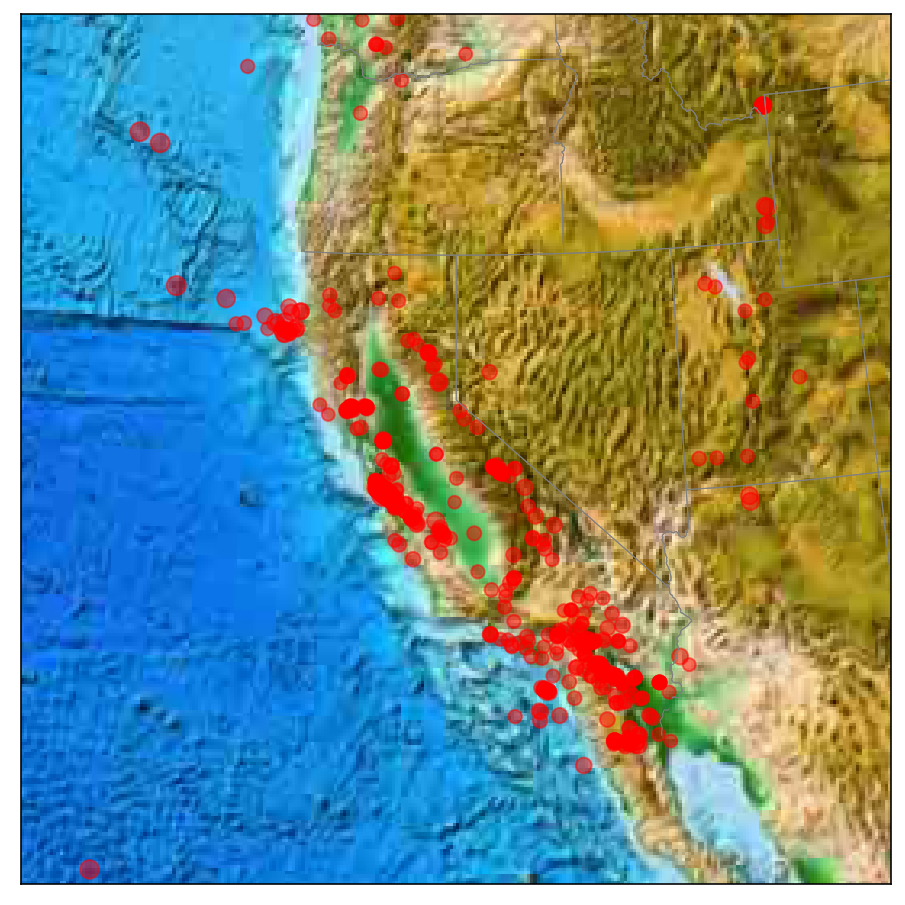

In [20]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=38, lon_0=-120,
            width=2.0E6, height=2.0E6)

# m.bluemarble()
m.etopo()


# m.drawcoastlines(color='blue',linewidth=3)
# m.drawcountries(color='gray',linewidth=3)
m.drawstates(color='gray')


lon = list(df_eq_lp["longitude"])
lat = list(df_eq_lp["latitude"])

m.scatter(lon,lat, latlon=True,
#           c=color,
          s=df_eq_lp['mag']/0.05,
          c = 'red',
#           cmap='YlGnBu_r',
          alpha=0.5)

# df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
#     s=df_eq_large['mag']/0.05, label="Large EQ",
#     alpha=0.4, figsize=(10,7), ax = ax
# )



In [21]:
# Source: https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

city = "California"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "name"
data = df_eq_lp.copy()

## create color column
lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)




## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

California, United States
[lat, long]: [36.7014631, -118.755997]


Text(0, 0.5, 'Magnitude')

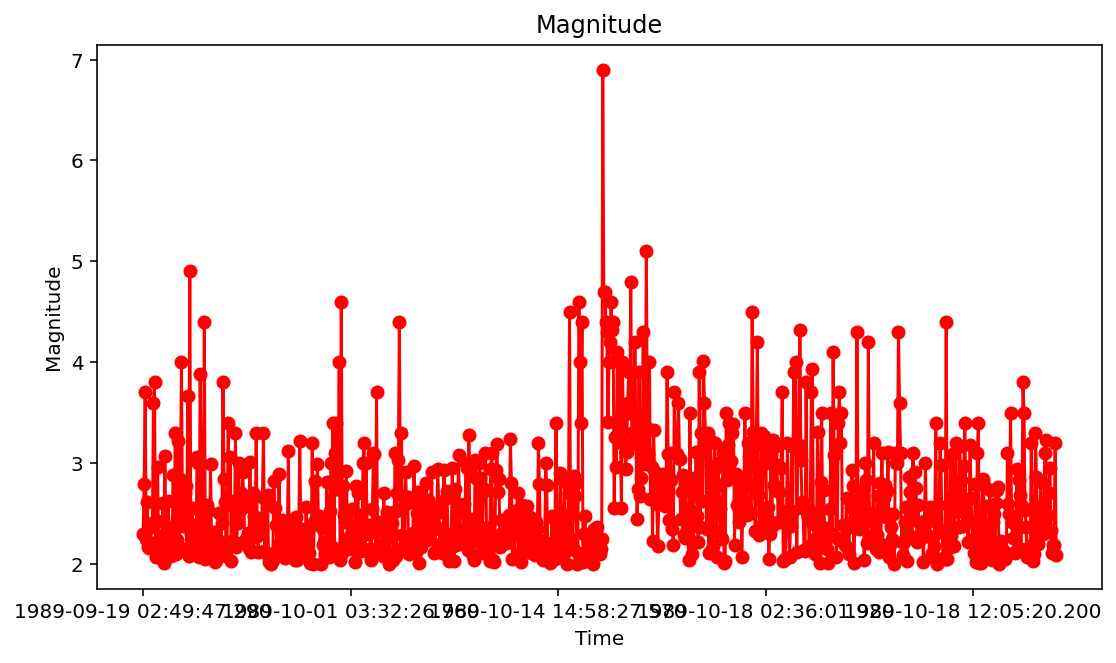

In [22]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_lp["mag"].plot(style="ro-")

plt.title("Magnitude")
plt.xlabel('Time')
plt.ylabel("Magnitude")

Figure suggests that the main shock, which had magnitude of 7 was just a spike in magnitude domain!

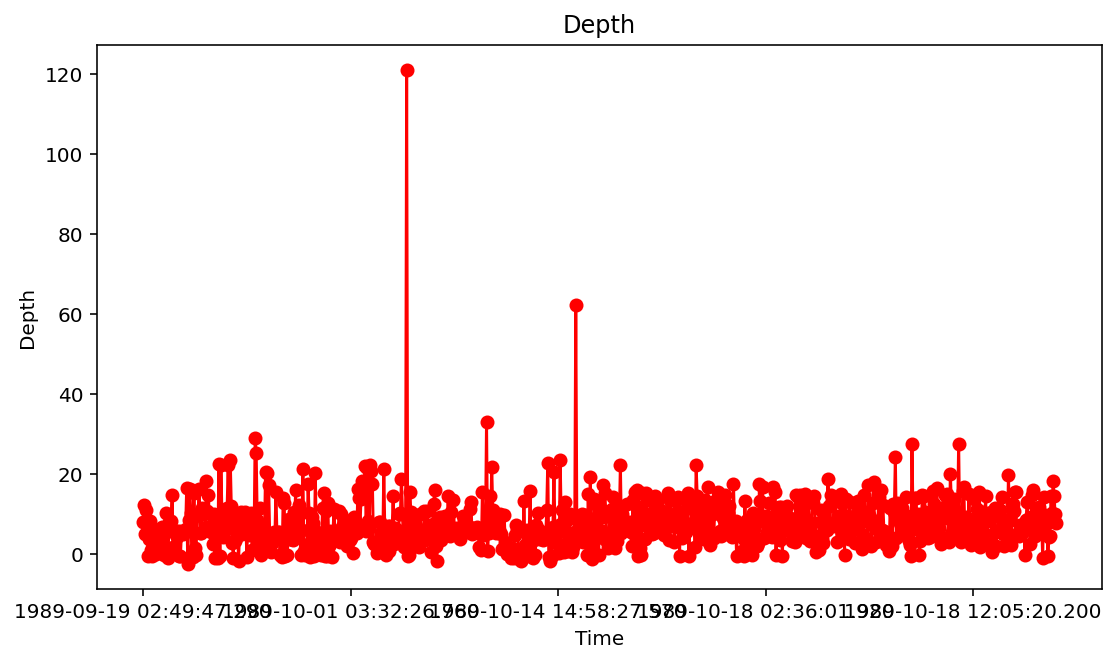

In [23]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_lp["depth"].plot(style="ro-")

plt.title("Depth")
plt.xlabel('Time')
plt.ylabel("Depth");

Same goes for depth!

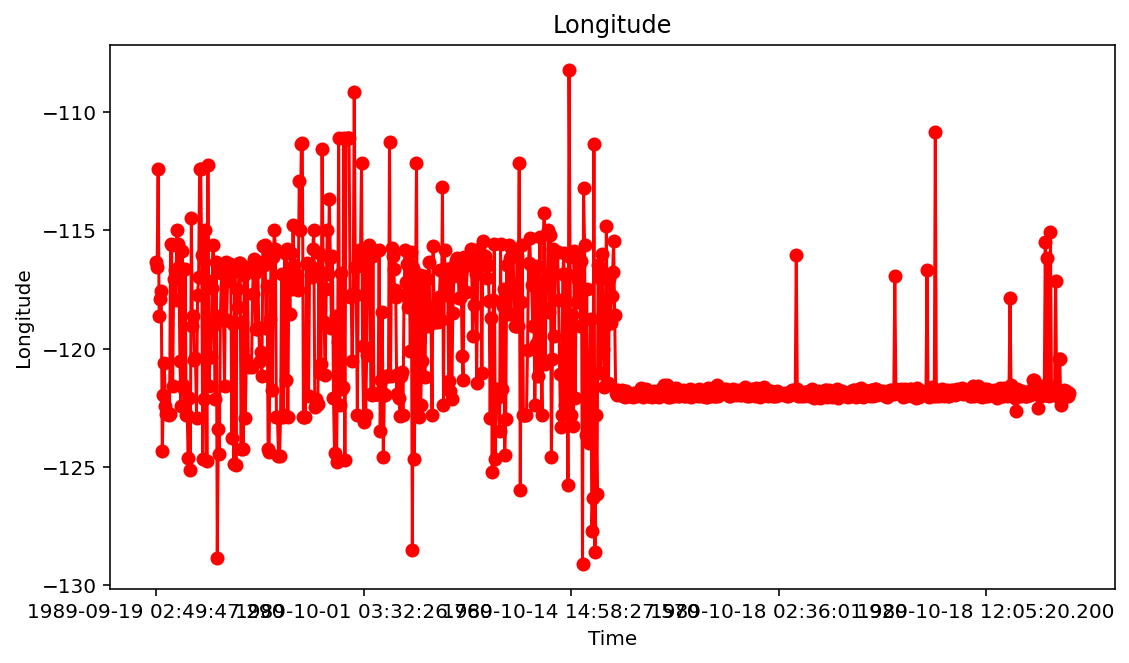

In [24]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_lp["longitude"].plot(style="ro-")

plt.title("Longitude")
plt.xlabel('Time')
plt.ylabel("Longitude");

Same goes for Longitude!

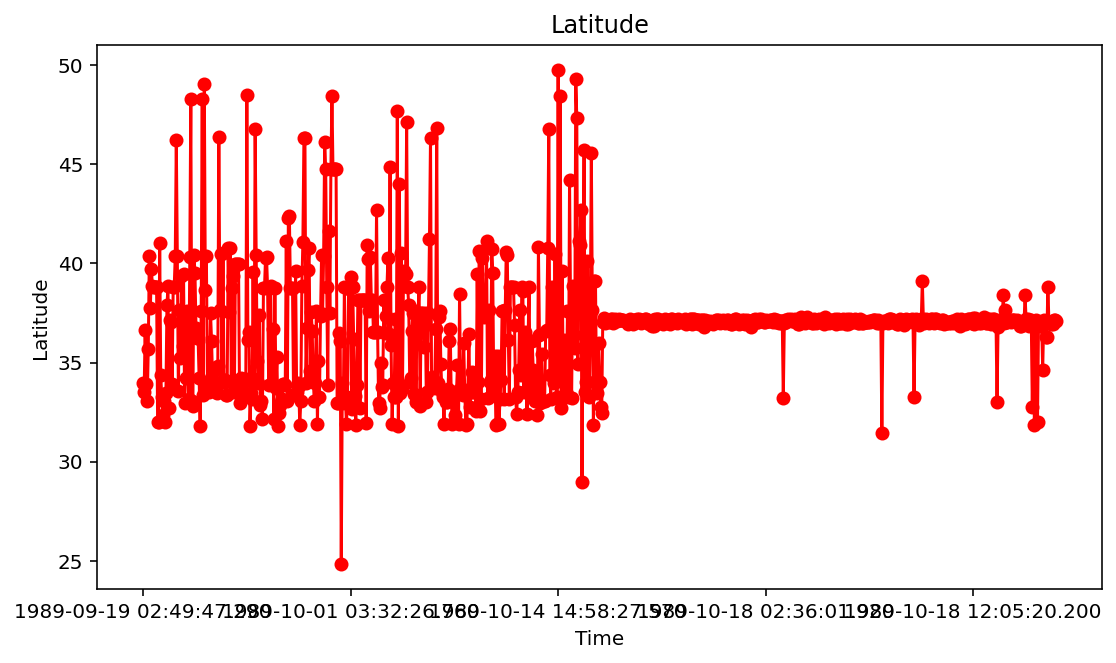

In [25]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_lp["latitude"].plot(style="ro-")

plt.title("Latitude")
plt.xlabel('Time')
plt.ylabel("Latitude");

Same goes for depth!

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

### Now, looking at tempral earthquake focus points

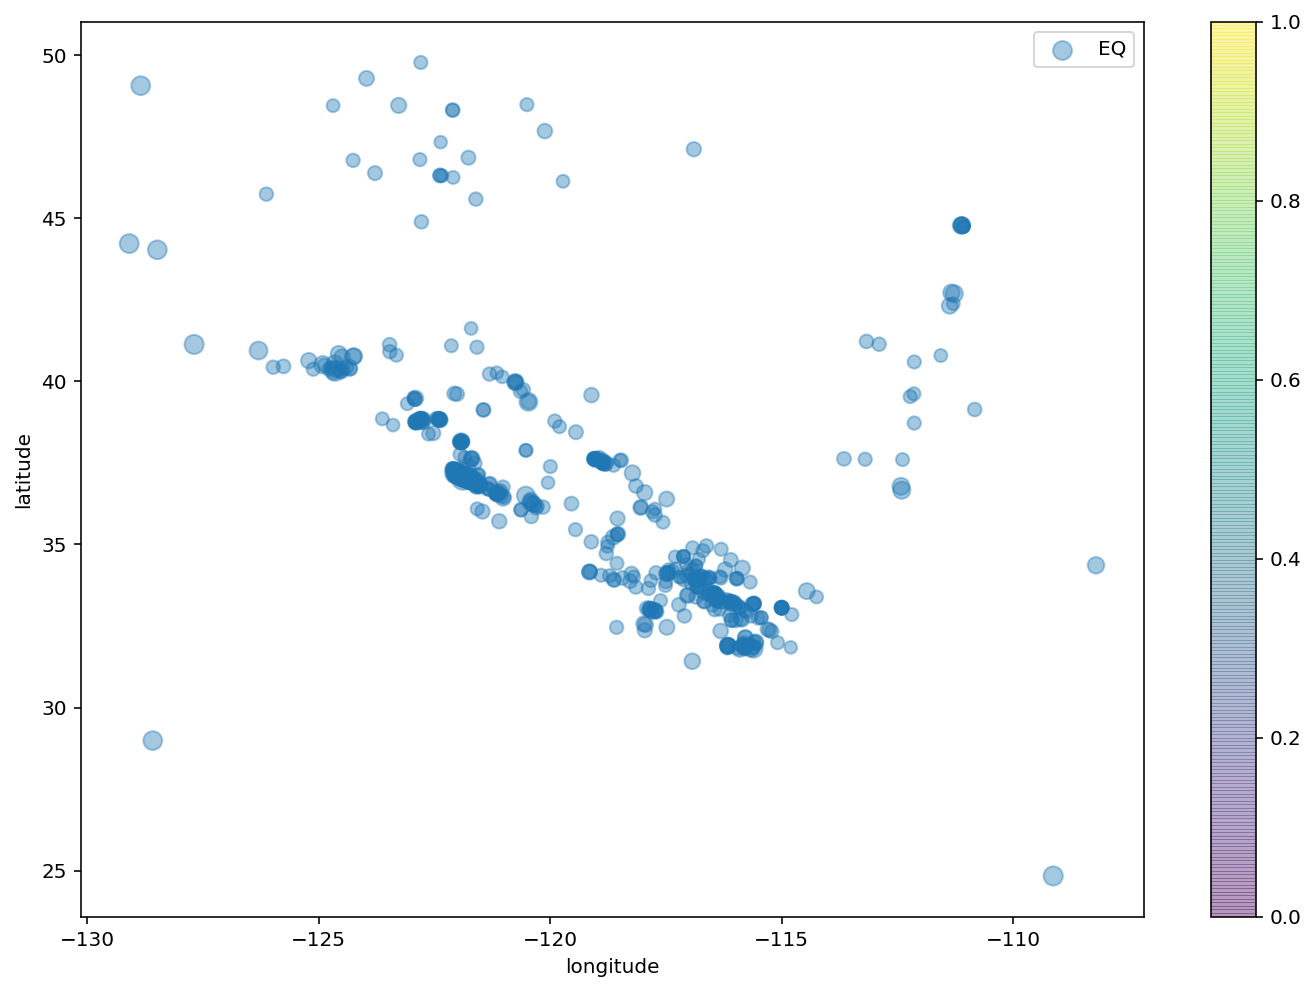

In [26]:
ax = plt.gca()

df_eq_lp.plot(kind="scatter", x="longitude", y="latitude",
    s=df_eq_lp['mag']/0.05, label="EQ",
#     c=df_eq_lp.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

# plt.savefig("../plots/EDA_long_lat.png")


plt.tight_layout()

### What happens to EQ cycle every one hour ?

In [27]:
print("Hello World!")

Hello World!
